#Using google colab for this presentation

In [1]:
import pandas as pd

from pandas import Series, DataFrame
import plotly.express as px

In [2]:
iris = px.data.iris()

In [3]:
iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1


#comparing sepal length and sepal width

In [4]:
px.scatter(iris, x = 'sepal_length', y = 'sepal_width', color = 'species')

#comparing petal length and petal width

In [5]:
px.scatter(iris, x = 'petal_length', y = 'petal_width', color = 'species')

#multiple scatter plots = scatter_metrix

not a pretty plot; let's beautify it

In [6]:
px.scatter_matrix(iris)

In [7]:
px.scatter_matrix(iris, dimensions=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], color='species', title='Multiple Scatter charts')

#count how many values of each species in the dataset

In [8]:
iris.groupby('species').size()

species
setosa        50
versicolor    50
virginica     50
dtype: int64

# bar chart for species 

In [9]:
px.histogram(iris, x = 'species', color = 'species')

# analyzing sepal length

In [10]:
px.histogram(iris, x = 'sepal_length', color = 'species', marginal = 'rug', hover_data=iris.columns)

#plot dist plot (curve) for the data

In [11]:
import plotly.figure_factory as ff
hist_data = [iris.sepal_length]
group_labels = ['Sepal Length Distribution']
fig = ff.create_distplot(hist_data, group_labels)
fig.show()

In [12]:
px.histogram(iris, x = 'sepal_width', color = 'species', marginal = 'rug', hover_data=iris.columns, title = 'Sepal Width')

#sepal width distribution plot

In [13]:
import plotly.figure_factory as ff
dist_data = [iris.sepal_width]
group_labels = ['Sepal width Dist.']

fig = ff.create_distplot(dist_data, group_labels)
fig.show()

#plot multiple datasets Sepal Length Vs. Sepal Width

In [14]:
import plotly.figure_factory as ff
x1 = iris.sepal_length
x2 = iris.sepal_width

hist_data = [x1, x2]
group_labels = ['Sepal Length', 'Sepal Width']

fig = ff.create_distplot(hist_data, group_labels)
fig.show()

#Analyzing petal length

In [15]:
px.histogram(iris, x = 'petal_length', color = 'species', marginal = 'rug', hover_data=iris.columns, title = 'Petal Length')

#petal width

In [16]:
px.histogram(iris, x = 'petal_width', color = 'species', marginal = 'rug', hover_data=iris.columns, title= 'Petal Width')

#histogram and dist. plot of petal length/width

In [17]:
import plotly.figure_factory as ff
x1 = iris.petal_length
x2 = iris.petal_width

hist_data = [x1, x2]
group_labels = ['Petal Length', 'Petal Width']

fig = ff.create_distplot(hist_data, group_labels)
fig.show()

#Dist. plot for sepal length/width and petal length/width

In [18]:
import plotly.figure_factory as ff
x1 = iris.sepal_length
x2 = iris.sepal_width
x3 = iris.petal_length
x4 = iris.petal_width

hist_data = [x1, x2, x3, x4]
group_labels = ['Sepal_length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']

ff.create_distplot(hist_data, group_labels)

#mean sepal length/width

In [19]:
pd.pivot_table(iris, index = 'species', values=['sepal_length', 'sepal_width'], aggfunc='mean')

,sepal_length,sepal_width
species,,
setosa,5.006,3.418
versicolor,5.936,2.770
virginica,6.588,2.974


#average petal length/width

In [20]:
pd.pivot_table(iris, index= 'species', values=['petal_length', 'petal_width'], aggfunc='mean')

,petal_length,petal_width
species,,
setosa,1.464,0.244
versicolor,4.260,1.326
virginica,5.552,2.026


#pie chart for each species

In [21]:
px.pie(iris,names='species')#values='tip'

In [22]:
px.pie(iris, names='species', hover_data=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

#sunburst chart for each species

upgrade plotly and restart runtime. Then run all cells again

In [23]:
!pip install --upgrade plotly

Requirement already up-to-date: plotly in /usr/local/lib/python3.6/dist-packages (4.14.3)


In [24]:
px.sunburst(iris, path = ['species', 'sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

In [31]:
px.bar(iris, x = iris.sepal_length, y = 'species', color='species', title='Sepal Length')

#using normalize parameter for the sepal length

In [33]:
pd.crosstab(iris.species, iris.sepal_length, normalize=True)

sepal_length,4.3,4.4,4.5,4.6,4.7,4.8,4.9,5.0,5.1,5.2,5.3,5.4,5.5,5.6,5.7,5.8,5.9,6.0,6.1,6.2,6.3,6.4,6.5,6.6,6.7,6.8,6.9,7.0,7.1,7.2,7.3,7.4,7.6,7.7,7.9
species,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
setosa,0.006667,0.02,0.006667,0.026667,0.013333,0.033333,0.026667,0.053333,0.053333,0.020000,0.006667,0.033333,0.013333,0.000000,0.013333,0.006667,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
versicolor,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.006667,0.013333,0.006667,0.006667,0.000000,0.006667,0.033333,0.033333,0.033333,0.020000,0.013333,0.026667,0.026667,0.013333,0.02,0.013333,0.006667,0.013333,0.020000,0.006667,0.006667,0.006667,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
virginica,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.006667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.006667,0.006667,0.020000,0.006667,0.013333,0.013333,0.013333,0.04,0.033333,0.026667,0.000000,0.033333,0.013333,0.020000,0.000000,0.006667,0.02,0.006667,0.006667,0.006667,0.026667,0.006667


#we can normalize all columns with crosstab

In [35]:
pd.crosstab(iris.species, iris.sepal_length, normalize='columns')

sepal_length,4.3,4.4,4.5,4.6,4.7,4.8,4.9,5.0,5.1,5.2,5.3,5.4,5.5,5.6,5.7,5.8,5.9,6.0,6.1,6.2,6.3,6.4,6.5,6.6,6.7,6.8,6.9,7.0,7.1,7.2,7.3,7.4,7.6,7.7,7.9
species,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
setosa,1.0,1.0,1.0,1.0,1.0,1.0,0.666667,0.8,0.888889,0.75,1.0,0.833333,0.285714,0.000000,0.250,0.142857,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
versicolor,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.2,0.111111,0.25,0.0,0.166667,0.714286,0.833333,0.625,0.428571,0.666667,0.666667,0.666667,0.5,0.333333,0.285714,0.2,1.0,0.375,0.333333,0.25,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
virginica,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.0,0.000000,0.00,0.0,0.000000,0.000000,0.166667,0.125,0.428571,0.333333,0.333333,0.333333,0.5,0.666667,0.714286,0.8,0.0,0.625,0.666667,0.75,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [36]:
pd.crosstab(iris.species, iris.sepal_length, normalize='index')

sepal_length,4.3,4.4,4.5,4.6,4.7,4.8,4.9,5.0,5.1,5.2,5.3,5.4,5.5,5.6,5.7,5.8,5.9,6.0,6.1,6.2,6.3,6.4,6.5,6.6,6.7,6.8,6.9,7.0,7.1,7.2,7.3,7.4,7.6,7.7,7.9
species,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
setosa,0.02,0.06,0.02,0.08,0.04,0.1,0.08,0.16,0.16,0.06,0.02,0.10,0.04,0.00,0.04,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
versicolor,0.00,0.00,0.00,0.00,0.00,0.0,0.02,0.04,0.02,0.02,0.00,0.02,0.10,0.10,0.10,0.06,0.04,0.08,0.08,0.04,0.06,0.04,0.02,0.04,0.06,0.02,0.02,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00
virginica,0.00,0.00,0.00,0.00,0.00,0.0,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.02,0.06,0.02,0.04,0.04,0.04,0.12,0.10,0.08,0.00,0.10,0.04,0.06,0.00,0.02,0.06,0.02,0.02,0.02,0.08,0.02


#corresponding rows and columns for each value

In [37]:
pd.crosstab(iris.species, [iris.sepal_length, iris.sepal_width])

sepal_length 4.3 4.4         4.5 4.6          ... 7.3 7.4 7.6 7.7             7.9
sepal_width  3.0 2.9 3.0 3.2 2.3 3.1 3.2 3.4  ... 2.9 2.8 3.0 2.6 2.8 3.0 3.8 3.8
species                                       ...                                
setosa         1   1   1   1   1   1   1   1  ...   0   0   0   0   0   0   0   0
versicolor     0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   0
virginica      0   0   0   0   0   0   0   0  ...   1   1   1   1   1   1   1   1

[3 rows x 116 columns]

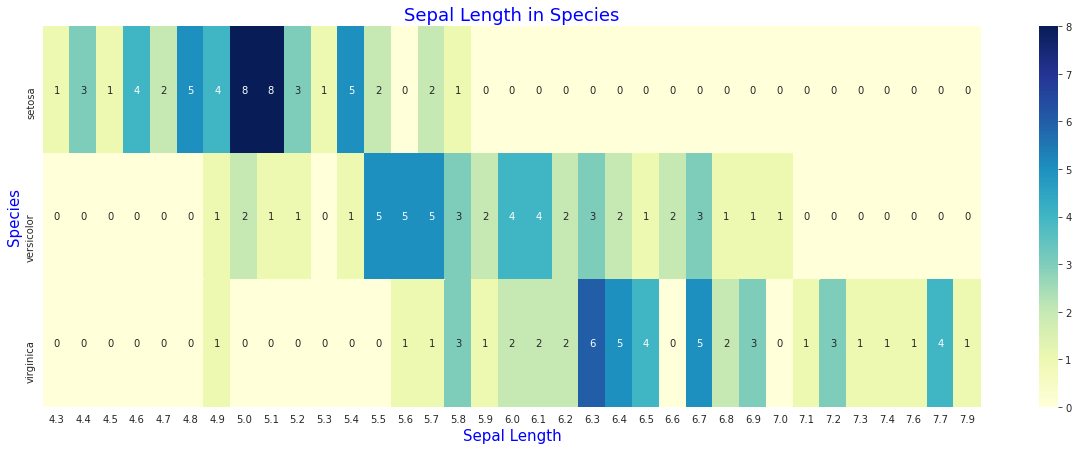

In [49]:
import matplotlib.pyplot as plt
sns.set_style('darkgrid')
import seaborn as sns
plt.figure(figsize=(21,7))
sns.color_palette("tab10")
sns.heatmap(pd.crosstab([iris.species], [iris.sepal_length]),cmap ="YlGnBu", annot = True, cbar = True)
plt.xlabel('Sepal Length', size = 15, color = 'b')
plt.ylabel('Species', size = 15, color = 'b')
plt.title('Sepal Length in Species', size = 18, color = 'b')
plt.show()